# Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
import random
from keras.models import Sequential
from keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

In [11]:
# length of training dataset
len(x_train)

60000

In [9]:
# length of testing dataset
len(x_test)

10000

In [13]:
# 60,000 images with 28*28 size of each image
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

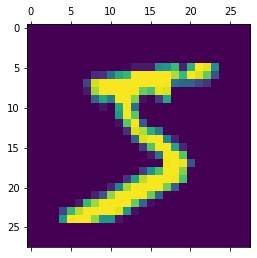

In [16]:
plt.matshow(x_train[0])

In [17]:
# Normalize the data

x_train = x_train/255
x_test = x_test/255

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
import keras

In [24]:
model = Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [27]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [30]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1003 - accuracy: 0.9726 - val_loss: 0.1105 - val_accuracy: 0.9675
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0970 - accuracy: 0.9738 - val_loss: 0.1072 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0936 - accuracy: 0.9743 - val_loss: 0.1054 - val_accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9752 - val_loss: 0.1042 - val_accuracy: 0.9698
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9759 - val_loss: 0.1013 - val_accuracy: 0.9683
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9762 - val_loss: 0.1001 - val_accuracy: 0.9696
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0827 - accuracy: 0.9773 - val_loss: 0.1005 - val_accuracy:

# Evaluate the model

In [45]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9724
Loss = 0.094
Accuracy = 0.972


# Make The Prediction

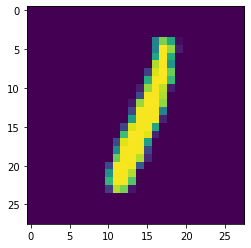

In [46]:
n = random.randint(0,9999);
plt.imshow(x_test[n])
plt.show()

In [47]:
prediction = model.predict(x_test)
print('The Handwritten number in the image is :- %d ' % np.argmax(prediction[n]))

313/313 [==============================] - 0s 1ms/step
The Handwritten number in the image is :- 1 


In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot Graph of Accuracy and Loss

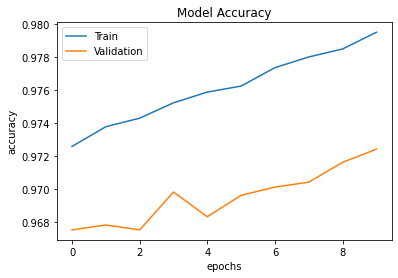

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

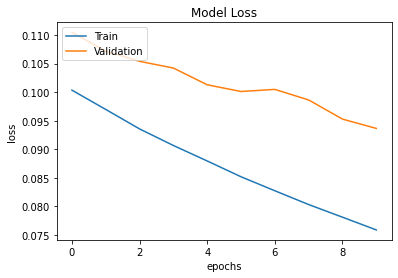

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

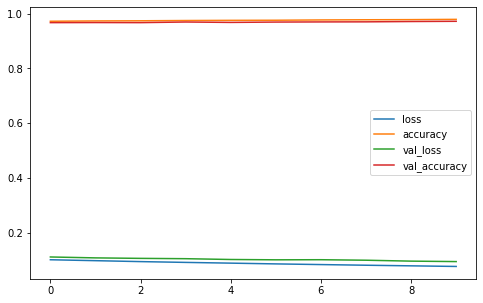

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()